# Implementation the Fuzzy C-Means Clustering Algorithm with OCC_Testrun dataset

## Import packages and Libraries

In [45]:
!pip install openpyxl 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [1]:
import pandas as pd
from fcmeans import FCM
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.spatial import ConvexHull
from scipy import interpolate

## Creating a class for Fuzzy C-Means Clustering

In [44]:
"""
Fuzzy C Means Clustering on Multi-dimensional Features

Algorithm:

Before using FCM algorithm, we transform the feature space into a 2-dimensional space by utilizing the t stochastic neighbor embedding (t-SNE) algorithm.

"""

class FCM_MD:
    def __init__(self, df):
        self.df = df
    
    def retrieve_components(self):
        # Retrieve numeric features
        self.df = self.df.select_dtypes('number')

        # Retrieve features
        features = self.df.values

        # Create tSNE Components
        tsne = TSNE(n_components=2, verbose=1, random_state=123)

        return tsne.fit_transform(features)
    
    def fcm(self, num_clusters: int, enable_tsne=False):
        # Instantiate FCM Algorithm
        self.model = FCM(n_clusters=num_clusters)

        if enable_tsne:
            # Instantiate Lower Dimensional DataFrame
            result_df = pd.DataFrame()

            z = self.retrieve_components()

            result_df['comp-1'] = z[:,0]
            result_df['comp-2']= z[:,1]
        
        else:
            result_df = self.df.select_dtypes('number')

        # Use Features from t-SNE Components
        features = result_df.values

        # Fit FCM Model
        self.model.fit(features)

        # Centers, Labels
        self.centers = self.model.centers
        self.labels = self.model.predict(features)

        # Look at the the two artifacts as a DataFrame
        result_df['cluster_labels'] = self.labels

        return result_df




## Elbow Criterion Method to Find the Number of Cluster

In [35]:
from warnings import filterwarnings

filterwarnings('ignore')

In [36]:
# Elbow Criterion
from os import getcwd, chdir

# Change Path to Raw folder
chdir("../../data/raw/")

# Read the DataFrame
df = pd.read_csv("OCC_testrun.csv")

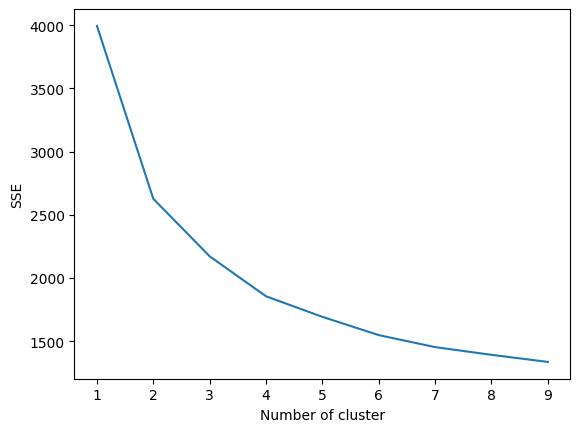

In [37]:
#Features are everything except SOC_Code
data = df.drop(['SOC_Code', 'Title'], axis=1)

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Run the FCM_MD Class

In [38]:
# Instnatiate the FCM_MD Class
fcm_md = FCM_MD(df)

# Create the FCM Results with 3 clusters
results = fcm_md.fcm(num_clusters=4)

# View Results DataFrame
print(results.head())

# Viewing the centers
print(fcm_md.centers.shape)

cen_x = [i[0] for i in fcm_md.centers]
cen_y = [i[1] for i in fcm_md.centers]

print(cen_x)
print(cen_y)


   Administration_and_Management  Administrative  Economics_and_Accounting  \
0                           5.44            4.97                      5.83   
1                           4.90            3.75                      3.45   
2                           5.50            5.43                      3.86   
3                           4.41            3.32                      4.00   
4                           4.08            4.51                      5.84   

   Sales_and_Marketing  Customer_and_Personal_Service  \
0                 4.36                           5.36   
1                 3.60                           4.70   
2                 2.93                           5.52   
3                 3.14                           4.23   
4                 2.13                           4.42   

   Personnel_and_Human_Resources  Production_and_Processing  Food_Production  \
0                           4.30                       1.85             0.15   
1                           

In [7]:
type(fcm_md)

__main__.FCM_MD

In [39]:
results.info()
results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Administration_and_Management     74 non-null     float64
 1   Administrative                    74 non-null     float64
 2   Economics_and_Accounting          74 non-null     float64
 3   Sales_and_Marketing               74 non-null     float64
 4   Customer_and_Personal_Service     74 non-null     float64
 5   Personnel_and_Human_Resources     74 non-null     float64
 6   Production_and_Processing         74 non-null     float64
 7   Food_Production                   74 non-null     float64
 8   Computers_and_Electronics         74 non-null     float64
 9   Engineering_and_Technology        74 non-null     float64
 10  Design                            74 non-null     float64
 11  Building_and_Construction         74 non-null     float64
 12  Mechanical

,Administration_and_Management,Administrative,Economics_and_Accounting,Sales_and_Marketing,Customer_and_Personal_Service,Personnel_and_Human_Resources,Production_and_Processing,Food_Production,Computers_and_Electronics,Engineering_and_Technology,...,Repairing,Quality_Control_Analysis,Judgment_and_Decision_Making,Systems_Analysis,Systems_Evaluation,Time_Management,Management_of_Financial_Resource,Management_of_Material_Resources,Management_of_Personnel_Resource,cluster_labels
0,5.44,4.97,5.83,4.36,5.36,4.30,1.85,0.15,3.97,0.49,...,0.00,1.50,3.88,3.25,3.25,3.75,3.62,2.12,4.00,2
1,4.90,3.75,3.45,3.60,4.70,4.25,4.00,0.30,3.95,4.89,...,0.00,3.12,4.25,3.62,3.88,4.00,4.00,3.88,4.25,0
2,5.50,5.43,3.86,2.93,5.52,4.96,2.85,0.52,4.89,2.25,...,0.00,1.62,4.00,3.38,3.88,4.00,3.62,3.62,4.12,1
3,4.41,3.32,4.00,3.14,4.23,3.09,3.43,0.38,4.45,4.64,...,0.00,0.62,3.75,3.62,3.25,3.00,3.88,3.25,2.50,1
4,4.08,4.51,5.84,2.13,4.42,3.00,1.14,0.21,3.98,0.41,...,0.00,1.12,3.75,3.62,3.44,3.38,2.56,1.75,3.06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2.24,1.23,0.97,2.08,4.12,1.10,1.41,0.67,1.66,0.47,...,2.00,2.25,2.12,1.38,1.25,2.88,1.12,1.12,1.62,3
70,2.42,1.83,0.85,0.97,2.58,1.50,2.47,0.27,2.49,2.94,...,2.75,2.88,2.62,1.12,2.00,2.88,0.62,0.62,2.25,3
71,1.83,1.46,0.53,1.14,2.42,0.55,3.32,0.42,1.48,0.97,...,2.00,1.88,2.12,1.75,1.75,2.25,0.88,0.88,1.50,3
72,1.47,1.79,0.55,0.85,1.63,1.03,2.20,0.25,2.03,0.90,...,1.88,2.12,2.12,1.75,1.50,2.12,0.38,1.00,1.75,3


### Print out the excel file of cluster data

In [40]:
df['cluster_labels'] = results['cluster_labels']

In [41]:
df['cluster_labels'] = df[['cluster_labels']].apply(lambda x: x+1) 

In [42]:
# Add total number of counts for cluster labels
df['cluster_labels'].value_counts().sum()

74

In [46]:
df.to_excel("Results_In_Excel_no_TSNE.xlsx")

### Point out the data points that belong to more than one cluster

In [47]:
# Reading in cluster membership data from R code
cluster_member_df = pd.read_csv("cluster_data.csv")

In [48]:
# Number of Rows and Columns
cluster_member_df.shape

(74, 5)

In [49]:
# Create Cluster Columns in the DataFrame
for col_name in cluster_member_df.columns:
    df[col_name] = cluster_member_df[col_name]

# View last 4 columns of DF
df.columns[-4:]

Index(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], dtype='object')

In [50]:
cluster_view = df[df.columns[-4:]]

df.iloc[6][['SOC_Code', 'Title', 'cluster_labels'] + df.columns[-4:].tolist()]

SOC_Code                               21-1023.00
Title             Mental Health and Substance Abu
cluster_labels                                  2
Cluster 1                                0.150995
Cluster 2                                 0.32868
Cluster 3                                0.354159
Cluster 4                                0.166166
Name: 6, dtype: object

In [54]:
formatted_df = df[['SOC_Code', 'Title', 'cluster_labels']]

formatted_df

,SOC_Code,Title,cluster_labels
0,11-3031.00,Financial Managers,3
1,11-9021.00,Construction Managers,1
2,11-9111.00,Medical and Health Services Man,2
3,13-1051.00,Cost Estimators,2
4,13-2011.00,Accountants and Auditors,3
...,...,...,...
69,53-3033.00,Light Truck Drivers,4
70,53-7021.00,Crane and Tower Operators,4
71,53-7051.00,Industrial Truck and Tractor Op,4
72,53-7062.00,"Laborers and Freight, Stock, an",4


In [57]:
formatted_df['cluster_labels'].value_counts()

4    27
3    19
1    16
2    12
Name: cluster_labels, dtype: int64

In [59]:
def cluster_member_per_title(titles, df):
    # create empty dictionary to store titles and cluster membership
    title_dict = {}

    for title in titles:
        spec_result = ','.join([str(value) for value in df[df['Title'] == title]['cluster_labels'].value_counts().index.tolist()])
        title_dict[title] = spec_result
    
    return title_dict

membership_results = cluster_member_per_title(formatted_df['Title'].unique(), formatted_df)

group_results = {k:v for k,v in membership_results.items() if ',' in v}

group_results

{}

In [63]:
# Specific DataFrames per Cluster Label

cluster_title_results = {}

for label in formatted_df['cluster_labels'].unique():
    label_df = formatted_df[formatted_df['cluster_labels'] == label]
    cluster_title_results[label] = label_df.drop('cluster_labels', axis=1)

cluster_title_results.keys()

cluster_title_results[1]

,SOC_Code,Title
1,11-9021.00,Construction Managers
31,47-1011.00,First-Line Supervisors of Const
32,47-2031.00,Carpenters
35,47-2111.00,Electricians
36,47-2152.00,"Plumbers, Pipefitters, and Stea"
37,47-4011.00,Construction and Building Inspe
38,49-1011.00,First-Line Supervisors of Mecha
39,49-2022.00,Telecommunications Equipment In
41,49-3031.00,Bus and Truck Mechanics and Die
43,49-9021.00,"Heating, Air Conditioning, and"


In [64]:
from pandas import ExcelWriter

with ExcelWriter("Codes_Titles_per_Cluster.xlsx") as writer:
    for label in cluster_title_results.keys():
        cluster_title_results[label].to_excel(writer, sheet_name=f"Cluster {label} Codes and Titles", index=False)

ValueError: I/O operation on closed file

### Finding Common Points Between Clusters

Within contour or hull plot, we know that a certain point will be in another hull or contour. We need to come up with an algorithm that allows us to know if the point belongs to the area of the hull or contour. Based on that, we can determine if the point belongs to more than one cluster.

## Visualization

In [ ]:
def prepare_visual_data(df, fcm_md):
    # Want to centers x and y
    centers = fcm_md.centers

    cen_x = [i[0] for i in centers]
    cen_y = [i[1] for i in centers]

    df['cen_x'] = df['cluster_labels'].map({i: cen_x[i] for i in df['cluster_labels'].unique()})
    df['cen_y'] = df['cluster_labels'].map({i: cen_y[i] for i in df['cluster_labels'].unique()})

    # Define colors
    colors = ['#DF2020', '#81DF20', '#2095DF', '#964B00']

    # Create color scheme
    df['c'] = df['cluster_labels'].map({i : colors[i] for i in range(len(colors))})

    return df, colors, cen_x, cen_y

result_df, colors, cen_x, cen_y = prepare_visual_data(results, fcm_md)

### Scatter Plot

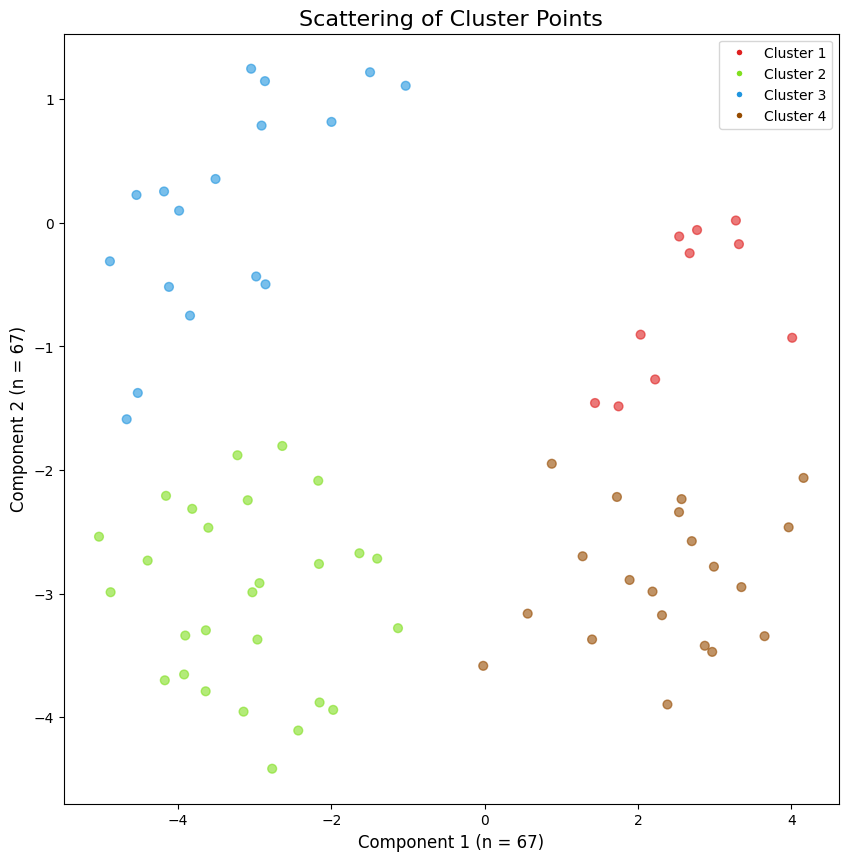

In [ ]:
# Scatter Plot
def create_scatter(df, colors):
    plt.figure(figsize=(10,10))
    plt.scatter(df['comp-1'], df['comp-2'], c=df['c'], alpha=0.6, s=40)
    plt.title("Scattering of Cluster Points", size=16)
    plt.xlabel(f'Component 1 (n = {fcm_md.df.shape[1]})', size=12)
    plt.ylabel(f'Component 2 (n = {fcm_md.df.shape[1]})', size=12)
    label_handles = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}',
                    markerfacecolor=mcolor, markersize=5) for i,
                    mcolor in enumerate(colors)]
    plt.legend(handles=label_handles, loc='upper right')
    plt.show()


create_scatter(result_df, colors)

### Contour Plot

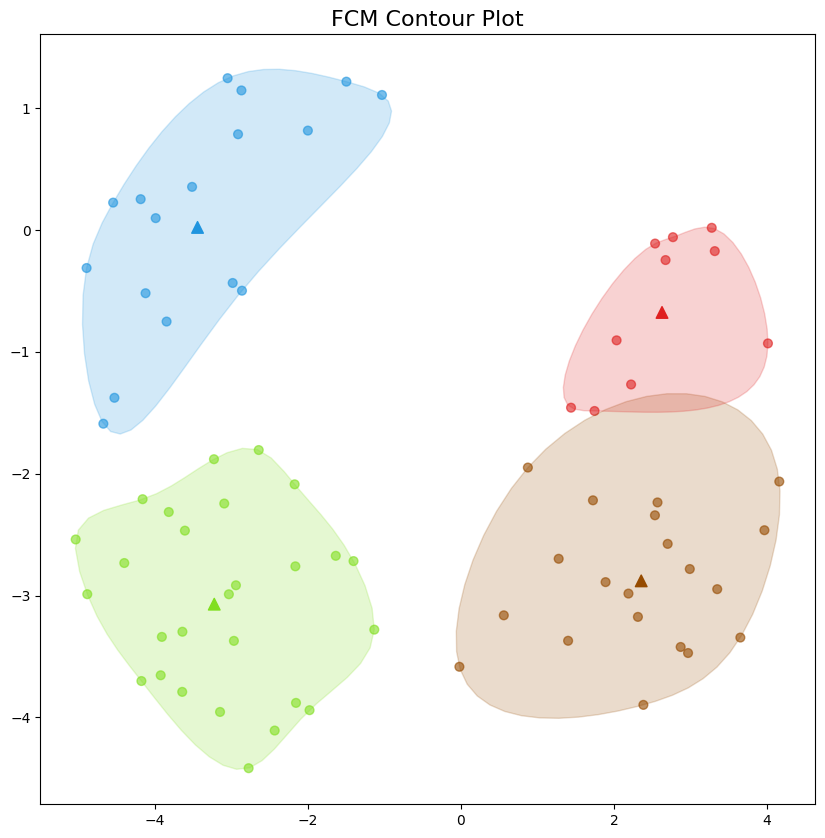

In [ ]:
# Contour Plot
def create_contour_plot(df, colors, cen_x, cen_y):
    plt.figure(figsize=(10,10))

    plt.title("FCM Contour Plot", size=16)
    
    # Scatter components
    plt.scatter(df['comp-1'], df['comp-2'], c=df.c, alpha=0.6, s=40)

    # Scattering the centers for both components
    plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

    # Go through each cluster and build convex hulls
    for i in df['cluster_labels'].unique():
        # Get the Convex Hull
        points = df[df['cluster_labels'] == i][['comp-1', 'comp-2']].values
        hull = ConvexHull(points)

        x_hull = np.append(points[hull.vertices, 0],
                            points[hull.vertices, 0][0])
        
        y_hull = np.append(points[hull.vertices, 1],
                            points[hull.vertices, 1][0])
        
        # Interpolation
        dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
        dist_along = np.concatenate(([0], dist.cumsum()))
        spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0, per=1)
        interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
        interp_x, interp_y = interpolate.splev(interp_d, spline)

        # Plot Shape
        plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)


    # plt.xlim(0, 200)
    # plt.ylim(0, 200)
    plt.show()

create_contour_plot(result_df, colors, cen_x, cen_y)